# Dependencies

In [1]:
!python -m pip install \
    polars==0.15.16 \
    treelib==1.6.1 \
    spacy==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.5.0/es_core_news_sm-3.5.0.tar.gz#egg=es_core_news_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.5.0/fr_core_news_sm-3.5.0.tar.gz#egg=fr_core_news_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.5.0/it_core_news_sm-3.5.0.tar.gz#egg=it_core_news_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.5.0/pt_core_news_sm-3.5.0.tar.gz#egg=pt_core_news_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.5.0/ru_core_news_sm-3.5.0.tar.gz#egg=ru_core_news_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/zh_core_web_sm-3.5.0/zh_core_web_sm-3.5.0.tar.gz#egg=zh_core_web_sm==3.5.0 \
    https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.5.0/xx_ent_wiki_sm-3.5.0.tar.gz#egg=xx_ent_wiki_sm==3.5.0

  Using cached es_core_news_sm-3.5.0-py3-none-any.whl
  Using cached fr_core_news_sm-3.5.0-py3-none-any.whl
  Using cached it_core_news_sm-3.5.0-py3-none-any.whl
  Using cached pt_core_news_sm-3.5.0-py3-none-any.whl
  Using cached ru_core_news_sm-3.5.0-py3-none-any.whl
  Using cached zh_core_web_sm-3.5.0-py3-none-any.whl
  Using cached xx_ent_wiki_sm-3.5.0-py3-none-any.whl


# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import treelib
import polars as pl
import spacy

import warnings
warnings.simplefilter("ignore")

# Data Frame 

In [3]:
content = pd.read_csv("content.csv")
correlations = pd.read_csv("correlations.csv")
topic = pd.read_csv("topics.csv")
df_topics = pl.read_csv("topics.csv")
df_correlations = pl.read_csv("correlations.csv")
sub = pd.read_csv("sample_submission.csv")

display(content.head())
display(topic.head())
display(correlations.head())
display(sub.head())

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_4054df11a74e,c_3695c5dc1df6 c_f2d184a98231


# Null Values Present in the DataFrames

In [4]:
print("content nan value sum:", content.isna().sum().sum())
print("topic nan value sum:", topic.isna().sum().sum())
print("correlations nan value sum:", correlations.isna().sum().sum())
print("sub nan value sum:", sub.isna().sum().sum())

content nan value sum: 306850
topic nan value sum: 42192
correlations nan value sum: 0
sub nan value sum: 0


# Dictionary View of Topic & Content

In [5]:
df_dt = {
    'Content':content,
    'Topic':topic
}
df_dt

{'Content':                     id                                             title  \
 0       c_00002381196d  Sumar números de varios dígitos: 48,029+233,930    
 1       c_000087304a9e                    Trovare i fattori di un numero   
 2       c_0000ad142ddb                           Sumar curvas de demanda   
 3       c_0000c03adc8d                               Nado de aproximação   
 4       c_00016694ea2a                  geometry-m3-topic-a-overview.pdf   
 ...                ...                                               ...   
 154042  c_fffcbdd4de8b                                  2. 12: Diffusion   
 154043  c_fffe15a2d069                      Sommare facendo gruppi da 10   
 154044  c_fffed7b0d13a                            Introdução à subtração   
 154045  c_ffff04ba7ac7                                      SA of a Cone   
 154046  c_ffffe5254266                                          The Jats   
 
                                               description     

# Null value imputation of License in Content Dataframe

In [6]:
content["license"] = content["license"].fillna("None")

# Checking Duplicated Values

In [7]:
print("content duplicated value sum:", content.duplicated().sum().sum())
print("topic duplicated value sum:", topic.duplicated().sum().sum())
print("correlations duplicated value sum:", correlations.duplicated().sum().sum())
print("sub duplicated value sum:", sub.duplicated().sum().sum())

content duplicated value sum: 0
topic duplicated value sum: 0
correlations duplicated value sum: 0
sub duplicated value sum: 0


# Value Count of every record

In [8]:
content['kind'].value_counts()

video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: kind, dtype: int64

In [9]:
content['language'].value_counts()

en     65939
es     30844
fr     10682
pt     10435
ar      7418
bg      6050
hi      4042
zh      3849
gu      3677
bn      2513
sw      1447
it      1300
mr       999
as       641
fil      516
km       505
kn       501
swa      495
or       326
pl       319
te       285
ur       245
tr       225
ta       216
my       206
ru       188
pnb      184
Name: language, dtype: int64

In [10]:
content['license'].value_counts()

None             80012
CC BY-NC-SA      52088
CC BY-NC-ND       8714
CC BY             5927
CC BY-SA          4554
Public Domain     2044
CC BY-NC           691
CC BY-ND            17
Name: license, dtype: int64

In [11]:
topic['category'].value_counts()

source          43487
supplemental    19368
aligned         14117
Name: category, dtype: int64

In [12]:
topic['level'].value_counts()

4     38810
3     14898
5      9744
6      6210
2      4874
1      1104
7      1028
0       171
8       119
9        12
10        2
Name: level, dtype: int64

In [13]:
topic['has_content'].value_counts()

True     61517
False    15455
Name: has_content, dtype: int64

In [14]:
topic['language'].value_counts()

en     36161
es     13910
pt      4177
ar      3701
fr      3701
bg      2867
sw      2860
gu      2320
bn      2176
hi      1786
it       866
zh       862
mr       300
fil      247
as       167
my       135
km       121
kn       119
te        93
or        70
ur        66
ta        60
pnb       51
pl        43
tr        40
swa       35
ru        34
mul        4
Name: language, dtype: int64

In [15]:
def cat_cat_dist(data=None, feat1="", feat2="", feat1_lim="all", h=True, figsize=(16, 4), title="", title_fontsize=20, rotate=False, cut_xlabel=False):
    data_copy = data.copy()
    data_copy.loc[:, "count"] = 1
    if feat1_lim != "all":
        feat1_lim_value = data_copy[feat1].value_counts().index[:feat1_lim]
        data_copy = data_copy.loc[data_copy[feat1].isin(feat1_lim_value), :]
        if cut_xlabel:
            data_copy[feat1] = data_copy[feat1].str[:int((1/feat1_lim)*400)]
    data_copy = data_copy.groupby([feat1, feat2], as_index=False).agg({"count":"sum"})
    data_copy_div = data_copy.groupby([feat1], as_index=False).agg({"count":"sum"})
    data_copy_div.columns = [feat1, "div"]
    data_copy = data_copy.merge(data_copy_div, on=feat1)
    data_copy["normalized_count"] = data_copy["count"] / data_copy["div"] 
    data_copy.sort_values("count", inplace=True, ascending=False)
    if h:
        fig, axes = plt.subplots(2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()

# Topic and Content Id's

In [16]:
content_ids_df = pd.DataFrame()
content_ids = correlations["content_ids"].str.split(" ")
content_ids_df["topic_id"] = correlations["topic_id"].values
content_ids_df["content_ids"] = content_ids
content_ids_df["content_ids_len"] = content_ids.str.len()
content_ids_df = content_ids_df.merge(topic[["id", "has_content"]], left_on="topic_id", right_on="id")

content_ids_df.head()

,topic_id,content_ids,content_ids_len,id,has_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4,t_00004da3a1b2,True
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4,t_00068291e9a4,True
2,t_00069b63a70a,[c_11a1dc0bfb99],1,t_00069b63a70a,True
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5,t_0006d41a73a8,True
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3,t_0008768bdee6,True


In [17]:
content_ids_df.groupby("has_content").agg({"content_ids_len":["mean", "median"]})

content_ids_len       
                       mean median
has_content                       
True               4.550271    3.0

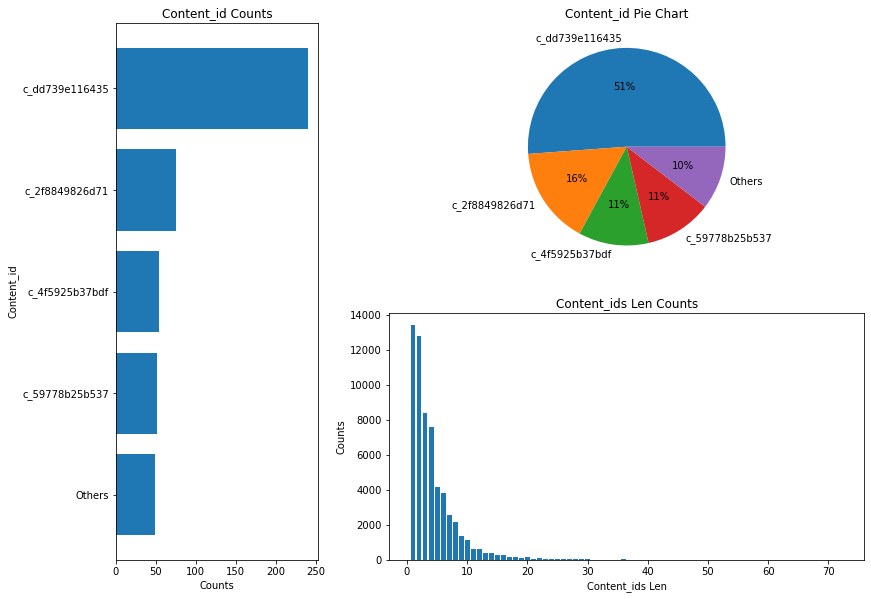

In [18]:
fig = plt.figure(figsize=(16, 12)) # initialize figure
axes = [None for _ in range(3)] # list to save many ax for setting parameter in each
axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1, rowspan=2)
axes[1] = plt.subplot2grid((3,4), (0,1), colspan=2)
axes[2] = plt.subplot2grid((3,4), (1,1), colspan=2)

# Chart 0
content_dict = {content_id: 0 for content_id in content["id"]}
for index, row in content_ids_df.iterrows():
    for content_id in row["content_ids"]:
        content_dict[content_id]+=1

content_ids_count_series = pd.Series(content_dict)
content_ids_count_series.sort_values(inplace=True, ascending=False)

content_ids_count_df = content_ids_count_series.to_frame()
content_ids_count_df.reset_index(inplace=True)
content_ids_count_df.columns = ["content_id", "count"]

content_ids_count_df.loc[content_ids_count_df["count"]<=49, ["content_id", "count"]] = ["Others", 49]
content_ids_count_df.drop_duplicates(inplace=True)

axes[0].barh(content_ids_count_df["content_id"][::-1], content_ids_count_df["count"][::-1]);
axes[0].set_title("Content_id Counts")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Content_id")

# Chart 1
axes[1].pie(content_ids_count_df["count"], labels = content_ids_count_df["content_id"],  autopct='%.0f%%');
axes[1].set_title("Content_id Pie Chart")

# Chart 2
content_ids_len_counts = content_ids_df["content_ids_len"].value_counts()[:50]
axes[2].bar(content_ids_len_counts.index, content_ids_len_counts.values)
axes[2].set_title("Content_ids Len Counts")
axes[2].set_xlabel("Content_ids Len")
axes[2].set_ylabel("Counts");

fig.tight_layout()

In [19]:
content.merge(content_ids_count_df, left_on="id", right_on="content_id")

,id,title,description,kind,text,language,copyright_holder,license,content_id,count
0,c_2f8849826d71,InfoPage,NaN,html5,This open text is disseminated via the Open Ed...,en,CSU and Merlot,CC BY-NC-SA,c_2f8849826d71,75
1,c_4f5925b37bdf,Index,NaN,html5,NaN,en,NaN,None,c_4f5925b37bdf,54
2,c_59778b25b537,Pasos siguientes,Descubra los pasos siguientes y recursos adici...,html5,Para recibir el certificado que necesita para ...,es,HP LIFE,CC BY,c_59778b25b537,52
3,c_dd739e116435,বই,NaN,document,NaN,bn,NaN,None,c_dd739e116435,241


In [20]:
def target_content_dist(feature="kind", ncols=3, h=False, figsize=(16,8)):
    feature_unique = content[feature].unique()
    feat_dict = {v: {v_inner:0 for v_inner in feature_unique} for v in feature_unique}
    
    content_id_map = content.set_index("id").to_dict()[feature]
    for index, row in content_ids_df.iterrows():
        row_values = []
        for content_id in row["content_ids"]:
            row_values.append(content_id_map[content_id])
        for v_uniq in set(row_values):
            for f_uniq in feature_unique:
                feat_dict[v_uniq][f_uniq] += row_values.count(f_uniq)
            feat_dict[v_uniq][v_uniq] -= 1
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, ax in enumerate(axes.ravel()[:len(feature_unique)+1]):
        if h:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.barh(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.barh(list(feat_dict[feat_name].keys()), list(feat_dict[feat_name].values()))
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
        else:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.bar(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.bar(feat_dict[feat_name].keys(), feat_dict[feat_name].values())
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique)+1:]:
        ax.set_visible(False)
    fig.tight_layout()

In [21]:
def content_ids_len_analysis(feature_name="kind", ncols=3, figsize=(16,8)):
    from matplotlib.offsetbox import AnchoredText
    
    feature_unique = content[feature_name].unique()
    df_content_ids_analysis = pd.DataFrame()
    for index, row in content_ids_df.iterrows():
        feature_dict = {feature_id: 0 for feature_id in feature_unique}
        content_part = content.loc[content["id"].isin(row["content_ids"]), :]
        value_counts = content_part[feature_name].value_counts()
        for v in feature_unique:
            try:
                feature_dict[v] = value_counts[v]
            except:
                feature_dict[v] = 0
        df_content_ids_analysis = df_content_ids_analysis.append(feature_dict, ignore_index=True)
    df_content_ids_analysis["content_ids_len"] = content_ids_df["content_ids_len"].values
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, (ax, feature) in enumerate(zip(axes.ravel()[:len(feature_unique)], feature_unique)):
        corr = df_content_ids_analysis[feature].corr(df_content_ids_analysis["content_ids_len"])
        scatter_kws = dict(
            alpha=0.75,
            s=3,
        )
        line_kws = dict(color='C3', )
        ax = sns.regplot(x=df_content_ids_analysis[feature],
                         y=df_content_ids_analysis["content_ids_len"],
                         scatter_kws=scatter_kws,
                         line_kws=line_kws,
                         lowess=True,
                         ax=ax)
        at = AnchoredText(
            f"{corr:.2f}",
            prop=dict(size="large"),
            frameon=True,
            loc="upper left",
        )
        at.patch.set_boxstyle("square, pad=0.0")
        ax.add_artist(at)
        
        ax.set_title(f"{feature} - content_ids_len scatter plot")
        ax.set_ylabel("content_ids_len")
        ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique):]:
        ax.set_visible(False)
    fig.tight_layout()

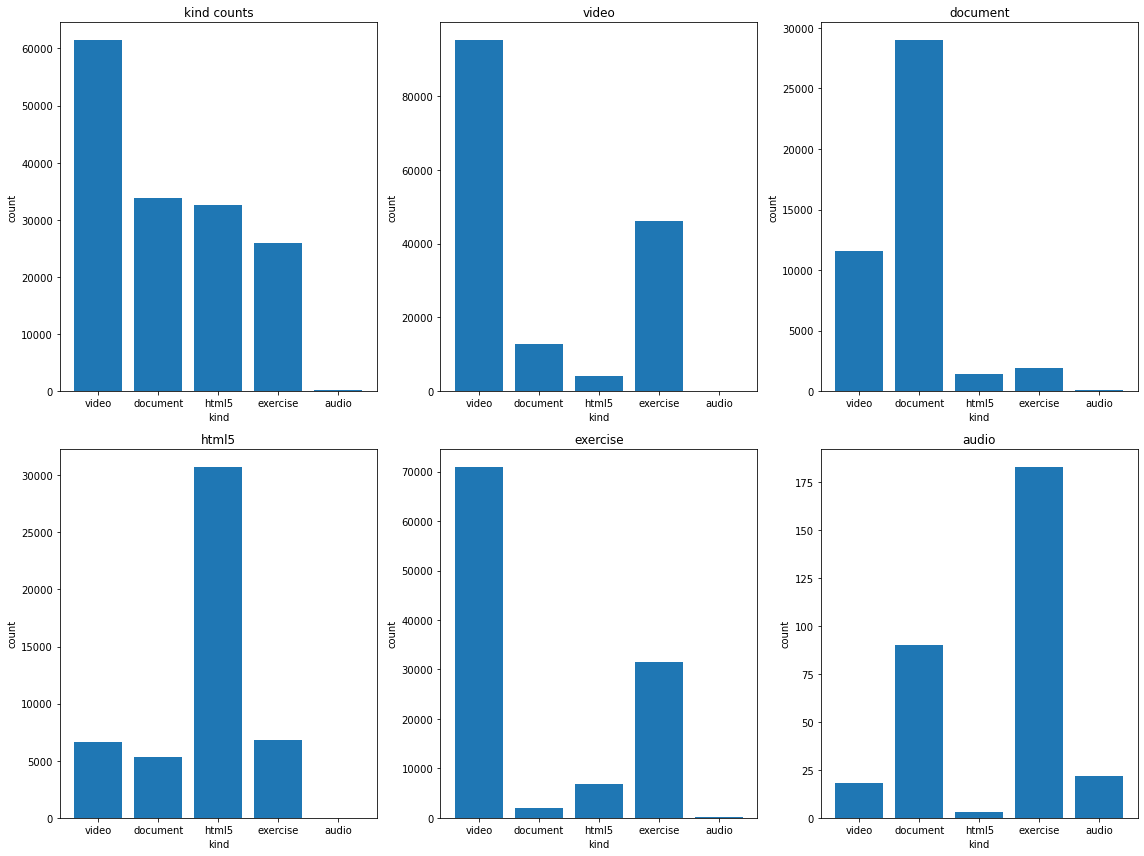

In [22]:
target_content_dist(feature="kind", ncols=3, figsize=(16,12))

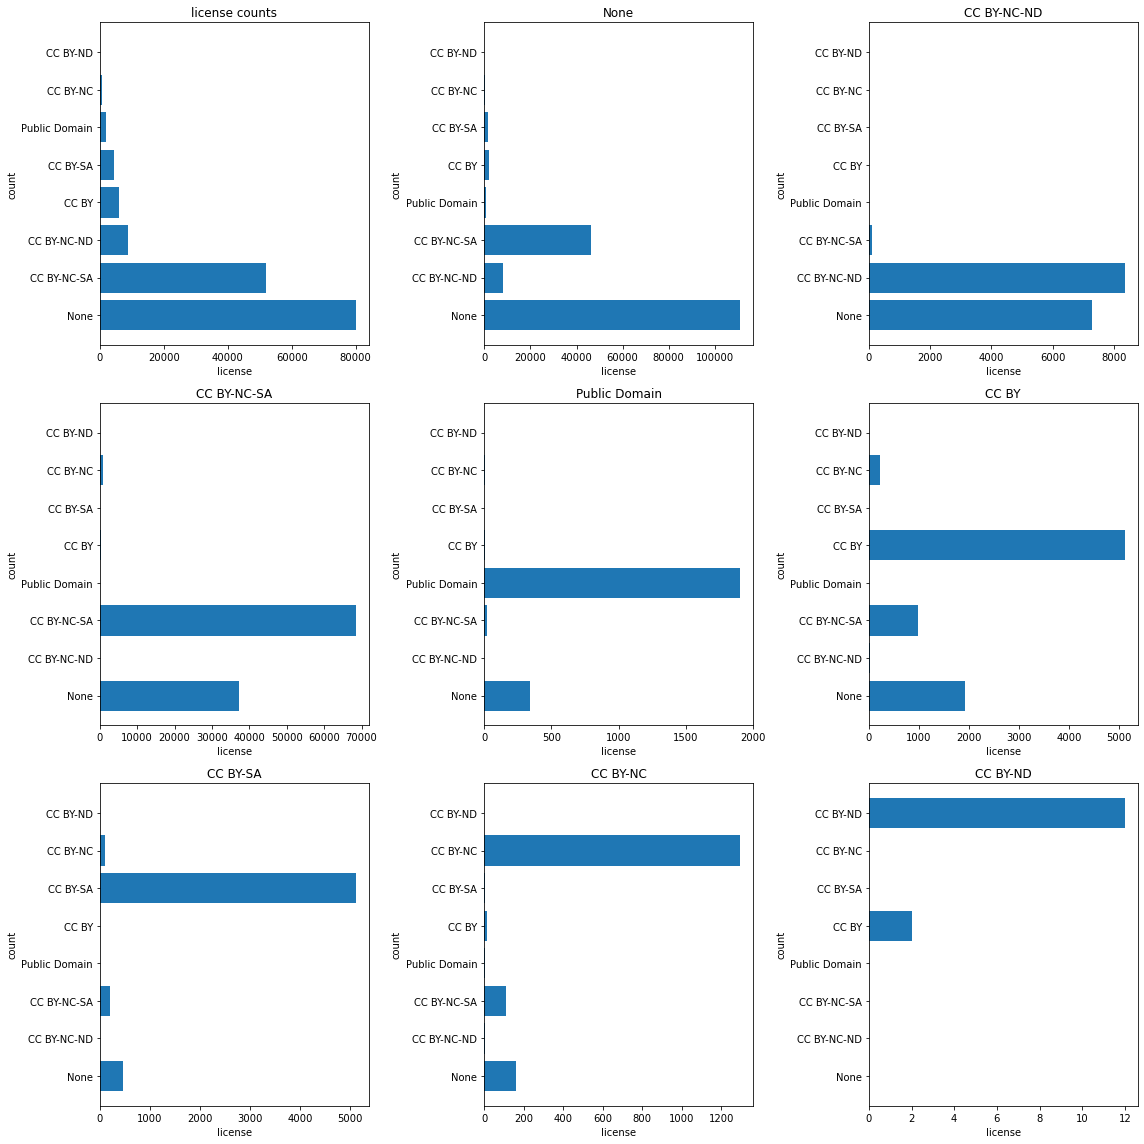

In [23]:
target_content_dist(feature="license", ncols=3, figsize=(16,16), h=True)

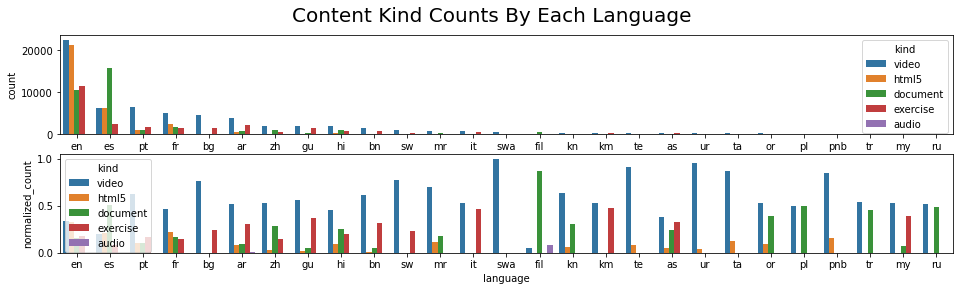

In [24]:
cat_cat_dist(data=content, feat1="language", feat2="kind", title="Content Kind Counts By Each Language")

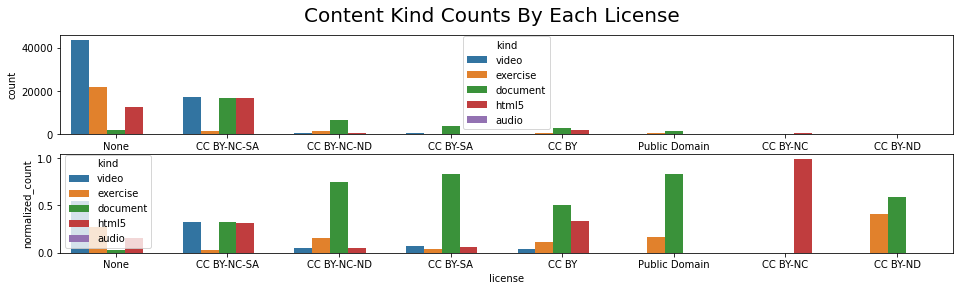

In [25]:
cat_cat_dist(data=content, feat1="license", feat2="kind", title="Content Kind Counts By Each License")

# Licenses:

* CC BY-NC-SA: This license lets others remix, tweak, and build upon your work non-commercially, as long as they credit you and license their new creations under the identical terms.
* CC BY-NC-ND: This license is the most restrictive license offered by Creative Commons. With this license, the user (while attributing the original creator) can only share the work but not change it in any way or ever use it commercially.
* CC BY-SA: This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format, so long as attribution is given to the creator.
* CC BY: This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format, so long as attribution is given to the creator. The license allows for commercial use.
* Public Domain: Public-domain-equivalent license are licenses that grant public-domain-like rights and/or act as waivers. They are used to make copyrighted works usable by anyone without conditions, while avoiding the complexities of attribution or license compatibility that occur with other licenses.
* CC BY-NC: This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format for noncommercial purposes only, and only so long as attribution is given to the creator.
* CC BY-ND: This license allows reusers to copy and distribute the material in any medium or format in unadapted form only, and only so long as attribution is given to the creator. The license allows for commercial use.

In [26]:
licenses_details = {
    "Limitation": {0:"Credit must be given to the creator", 
                  1:"Adaptations must be shared under the same terms", 
                  2:"Only noncommercial uses of the work are permitted",
                  3:"No derivatives or adaptations of the work are permitted"},
    "CC BY": {0:True, 1:False, 2:False, 3:False},
    "CC BY-ND": {0:True, 1:False, 2:False, 3:True},
    "CC BY-SA": {0:True, 1:True, 2:False, 3:False},
    "CC BY-NC": {0:True, 1:False, 2:True, 3:False},
    "CC BY-NC-SA": {0:True, 1:True, 2:True, 3:False},
    "CC BY-NC-ND": {0:True, 1:False, 2:True, 3:True},
    "Public Domain": {0:False, 1:False, 2:False, 3:False}
}

df_licenses_def = pd.DataFrame(licenses_details)
df_licenses_def.set_index("Limitation", inplace=True)
df_licenses_def

,CC BY,CC BY-ND,CC BY-SA,CC BY-NC,CC BY-NC-SA,CC BY-NC-ND,Public Domain
Limitation,,,,,,,
Credit must be given to the creator,True,True,True,True,True,True,False
Adaptations must be shared under the same terms,False,False,True,False,True,False,False
Only noncommercial uses of the work are permitted,False,False,False,True,True,True,False
No derivatives or adaptations of the work are permitted,False,True,False,False,False,True,False


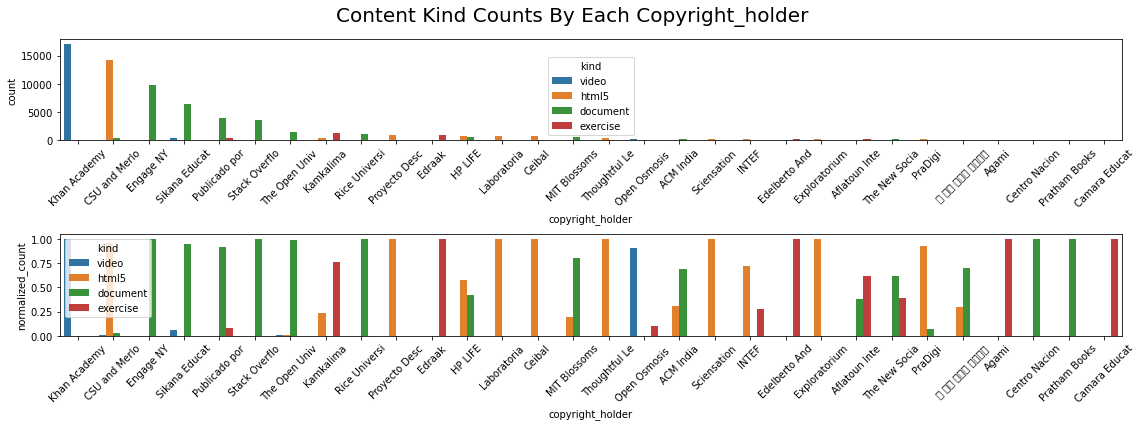

In [27]:
cat_cat_dist(data=content, feat1="copyright_holder", feat2="kind", title="Content Kind Counts By Each Copyright_holder", 
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

In [28]:
content["title_len"] = content["title"].str.len()
content["description_len"] = content["description"].str.len()
content["text_len"] = content["text"].str.len()

content[["title_len", "description_len", "text_len"]].describe()

,title_len,description_len,text_len
count,154038.000000,89456.000000,74035.000000
mean,33.829782,124.291249,10531.613440
std,18.106550,250.144003,18016.019783
min,1.000000,1.000000,1.000000
25%,21.000000,51.000000,1853.000000
50%,31.000000,82.000000,4486.000000
75%,44.000000,122.000000,10016.000000
max,177.000000,9710.000000,100000.000000


In [29]:
topic.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


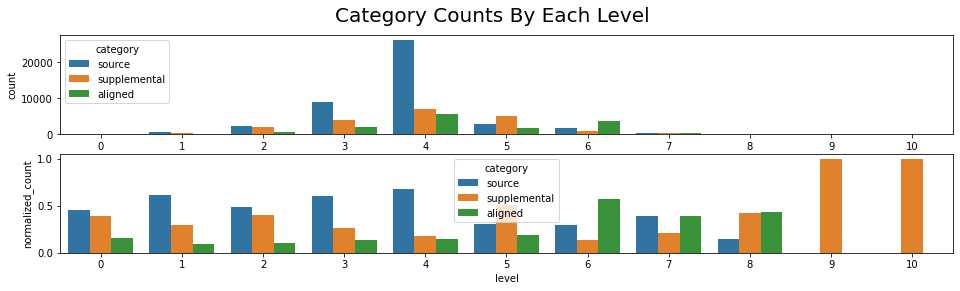

In [30]:
cat_cat_dist(data=topic, feat1="level", feat2="category", title="Category Counts By Each Level")

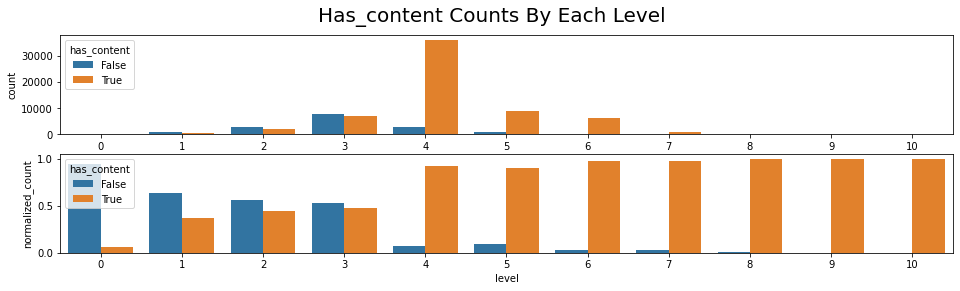

In [31]:
cat_cat_dist(data=topic, feat1="level", feat2="has_content", title="Has_content Counts By Each Level")

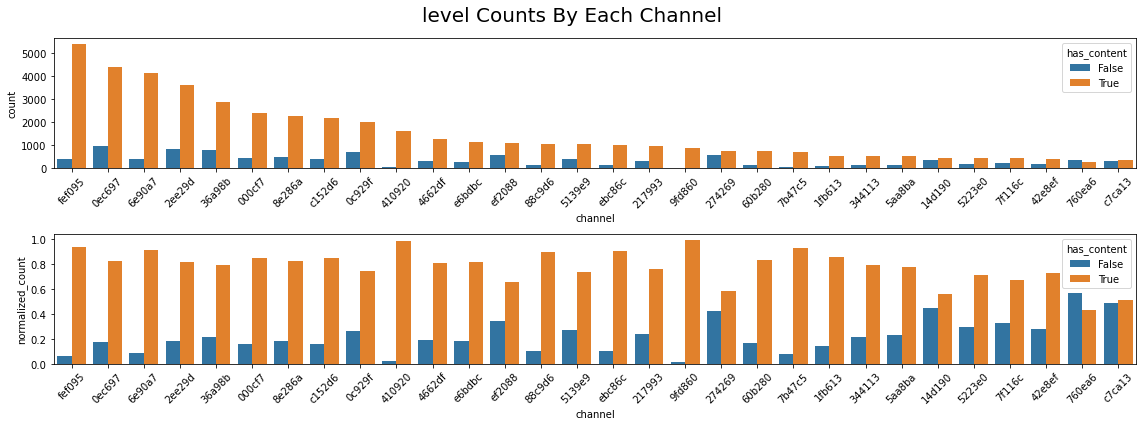

In [32]:
cat_cat_dist(data=topic, feat1="channel", feat2="has_content", title="level Counts By Each Channel",
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

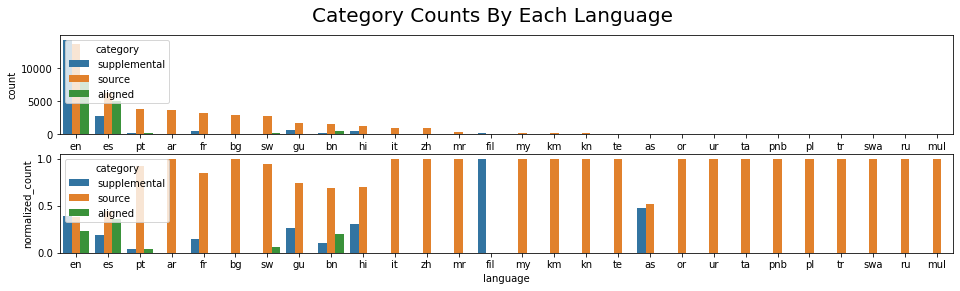

In [33]:
cat_cat_dist(data=topic, feat1="language", feat2="category", title="Category Counts By Each Language")

In [34]:
topic.loc[topic["category"]!="source", "language"].value_counts()

en     22549
es      7733
bn       670
gu       608
fr       552
hi       541
pt       343
fil      247
sw       162
as        80
Name: language, dtype: int64

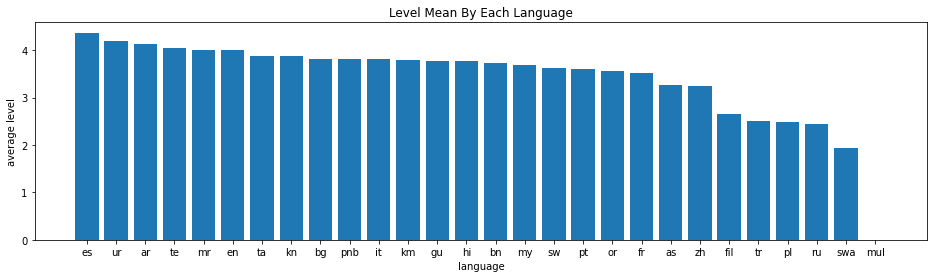

In [35]:
topic_l_l = topic.groupby("language", as_index=False).agg({"level":"mean"})
topic_l_l.sort_values("level", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(topic_l_l["language"], topic_l_l["level"]);
ax.set_title("Level Mean By Each Language")
ax.set_xlabel("language")
ax.set_ylabel("average level");

In [36]:
def get_tree_analysis(channel="fef095", language="en", parent=None):
    if parent is not None:
        condition = ((topic["channel"]==channel)&(topic["language"]==language)&(topic["parent"]==parent))
    else:
        condition = ((topic["channel"]==channel)&(topic["language"]==language))
    part_topic = topic.loc[condition, :].copy()
    part_topic = part_topic.merge(correlations, left_on="id", right_on="topic_id")
    part_topic["count"] = 1
    print(10*"-"+ " channel: " + channel + " " + 10*"-")
    print("id nunique: ", part_topic["id"].nunique())
    print("parent nunique: ", part_topic["parent"].nunique())
    
    content_counts = {
        'kind': {'video':0, 
                 'document':0, 
                 'html5':0, 
                 'exercise':0, 
                 'audio':0},
        'license': {"None":0, 
                    'CC BY-NC-ND':0, 
                    'CC BY-NC-SA':0, 
                    'Public Domain':0, 
                    'CC BY':0,
                    'CC BY-SA':0, 
                    'CC BY-NC':0, 
                    'CC BY-ND':0},
        'language': {'es': 0, 'it': 0, 'pt': 0, 'en': 0, 'mr': 0, 'bg': 0, 'gu': 0, 'sw': 0, 'hi': 0,
                     'ar': 0, 'bn': 0, 'as': 0, 'zh': 0, 'fr': 0, 'km': 0, 'pl': 0, 'ta': 0, 'fil': 0,
                     'or': 0, 'ru': 0, 'kn': 0, 'swa': 0, 'my': 0, 'pnb': 0, 'tr': 0, 'te': 0, 'ur': 0},
    }
    for index,row in part_topic.iterrows():
        for content_id in row["content_ids"].split(" "):
            part_content = content.loc[content["id"]==content_id, :]
            part_content.fillna("None", inplace=True)
            content_counts['kind'][part_content["kind"].values[0]] += 1
            content_counts['license'][part_content["license"].values[0]] += 1
            content_counts['language'][part_content["language"].values[0]] += 1
    
    #fig, axes = plt.subplots(5, figsize=(16,16))
    fig = plt.figure(figsize=(16, 6)) # initialize figure
    axes = [None for _ in range(5)] # list to save many ax for setting parameter in each
    axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1)
    axes[1] = plt.subplot2grid((3,4), (0,1), colspan=3)
    axes[2] = plt.subplot2grid((3,4), (1,0), colspan=1)
    axes[3] = plt.subplot2grid((3,4), (1,1), colspan=3)
    axes[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
    
    
    # Category
    part_topic_temp = part_topic.groupby("category", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[0].bar(part_topic_temp["category"], part_topic_temp["count"]);
    axes[0].set_title("Count By Each Category")
    axes[0].set_xlabel("category")
    axes[0].set_ylabel("count");
    
    # Kind
    content_kind = pd.Series(content_counts["kind"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[1].bar(content_kind.index, content_kind.values);
    axes[1].set_title("Count By Each Kind")
    axes[1].set_xlabel("kind")
    axes[1].set_ylabel("count");
    
    # Level
    part_topic_temp = part_topic.groupby("level", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[2].bar(part_topic_temp["level"], part_topic_temp["count"]);
    axes[2].set_title("Count By Each Level")
    axes[2].set_xlabel("level")
    axes[2].set_ylabel("count");
    
    # License
    content_kind = pd.Series(content_counts["license"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[3].bar(content_kind.index, content_kind.values);
    axes[3].set_title("Count By Each License")
    axes[3].set_xlabel("license")
    axes[3].set_ylabel("count");
    
    # Language
    content_kind = pd.Series(content_counts["language"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[4].bar(content_kind.index, content_kind.values);
    axes[4].set_title("Count By Each Language")
    axes[4].set_xlabel("language")
    axes[4].set_ylabel("count");
    
    fig.tight_layout()

---------- channel: af86ca ----------
id nunique:  5
parent nunique:  1


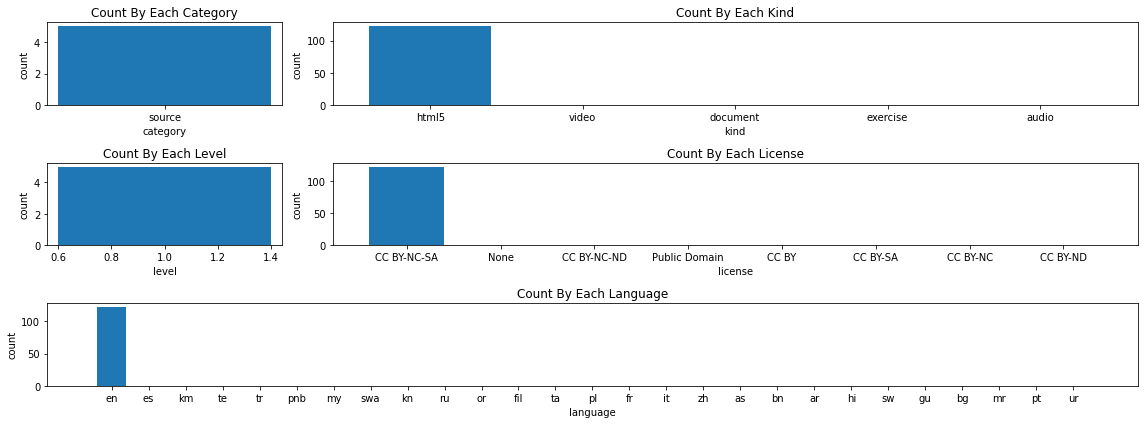

In [37]:
get_tree_analysis(channel="af86ca", language="en")

---------- channel: fef095 ----------
id nunique:  112
parent nunique:  1


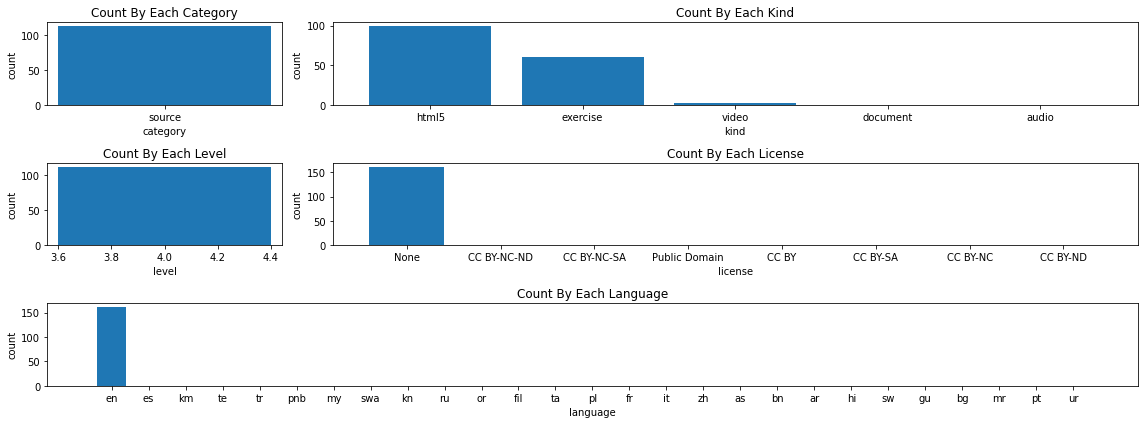

In [38]:
get_tree_analysis(channel="fef095", language="en", parent="t_009fc1677c8e")

---------- channel: fef095 ----------
id nunique:  5394
parent nunique:  308


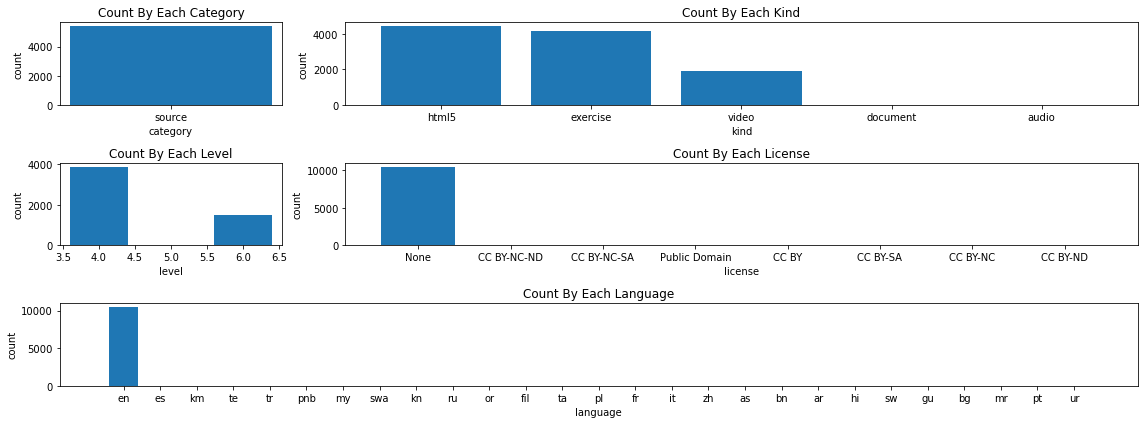

In [39]:
get_tree_analysis(channel="fef095", language="en", parent=None)

In [40]:
df_topics = df_topics.sort(by=['level'])

# Count how many times is used each topic
df_topics_corr = df_correlations.clone()
df_topics_corr = df_topics_corr.with_columns([
    pl.struct(['content_ids']).apply(
        lambda row: len(row['content_ids'].split(' '))).alias('hits')
])
df_topics_corr = df_topics_corr.sort(by=['hits'], reverse=True)

In [41]:
path2topics = {}
for row in df_topics[['id', 'parent']].iterrows():
    topic_id, parent = row
    path2topics[topic_id] = set(path2topics[parent]).union([parent]) if parent else set()

# Pick the N topics most used (if a topic was a child from another, add the parents too)
# N=80 seems to be a reasonable value based on the previous plot
top_topics = 80
top_topic_ids = set(df_topics_corr['topic_id', :top_topics])
for topic_id in top_topic_ids.copy():
    for parent_id in path2topics[topic_id]:
        top_topic_ids.add(parent_id)

top_topic_ids = list(top_topic_ids)
print(f'Total top-topics: {len(top_topic_ids)}')

Total top-topics: 190


In [42]:
# Higher topics should be parsed first
df_top_topics = df_topics.clone()
df_top_topics = df_top_topics.filter(pl.col('id').is_in(top_topic_ids))
df_top_topics = df_top_topics.sort(by='level')

# Create tree
tree = treelib.Tree()
tree.create_node('All topics', 'root-node')
for row in df_top_topics[['id', 'title', 'parent']].iterrows():
    topic_id, topic_title, topic_parent = row
    tree.create_node(
        str(topic_title),
        topic_id,
        parent=topic_parent if topic_parent else 'root-node')

In [43]:
tree.show()

All topics
├── Abdulla Eid Network (العربيّة)
│   ├── Android 101
│   ├── Java 101
│   ├── Java 102
│   ├── JavaScript DOM
│   ├── PHP 101
│   └── دورة بناء سكربت منتدى
├── CREE
│   └── Para el Estudiante
│       └── III Ciclo
│           └── Videos de Historia de Honduras
│               └── Noveno
├── Camara Education - Ethiopia
│   └── Math Grade 9
│       └── Unit 4: Relations and Functions
│           └── 4.3 Graphs of functions
│               └── 4.3.1 graphs of linear as functions
├── Ceibal
│   ├── Ciencias Sociales
│   │   └── Social
│   │       └── Inicial y Primaria
│   └── Ciencias de la vida, de la tierra y del espacio
│       └── Naturaleza
│           └── Inicial y Primaria
├── EngageNY (es)
│   ├── Grade 10 Artes del lenguaje inglés
│   │   ├── Módulo 3
│   │   └── Módulo 4
│   ├── Grade 12 Artes del lenguaje inglés
│   │   └── Módulo 3
│   └── Grado 11 Artes del lenguaje inglés
│       └── Módulo 3
├── Exploratorium
│   ├── Activities
│   │   └── Physics
│   │       └